## Importing the required libraries 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np

### Loading the required Dataset

In [ ]:
data=pd.read_csv('replicase_final.csv')

In [ ]:
data.head()

,smiles,id,MW,LogP,HBD,HBA,PSA,pIC50
0,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,CHEMBL194398,580.682,2.68582,8.0,3.0,156.70,3.060481
1,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL393608,547.653,1.39862,8.0,4.0,168.73,3.698970
2,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL238216,581.670,1.59522,8.0,4.0,168.73,3.522879
3,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL235873,659.781,0.87060,9.0,6.0,201.26,4.823909
4,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL397154,625.764,0.67400,9.0,6.0,201.26,5.000000


### *Creating a dataframe consisting of the features and bioactivity values*

In [ ]:
df_final=data.loc[:,['LogP','HBD','HBA','PSA','pIC50']]

In [ ]:
df_final=df_final.dropna()
df_final.dtypes

LogP     float64
HBD      float64
HBA      float64
PSA      float64
pIC50    float64
dtype: object

In [ ]:
X=df_final.loc[:,['LogP','HBD','HBA','PSA']]
val=X.values

In [ ]:
#scalar=StandardScaler()
#Xn=scalar.fit_transform(val)
#X=Xn

### Examining the Data Dimension

In [ ]:
X.shape

(214, 4)

## Selecting the features and bioactivity values from the dataframe 

In [ ]:
x=X
y=df_final.loc[:,'pIC50']


## Importing the library for splitting of dataset

In [ ]:
from sklearn.model_selection import train_test_split


## Splitting the data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

### Dimensions of the split

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 4)
(43, 4)
(171,)
(43,)


# Building a Regression model using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg1=RandomForestRegressor(random_state=6)
reg1.fit(X_train,y_train)

RandomForestRegressor(random_state=6)

### Making the prediction

In [ ]:
pred1=reg1.predict(X_test)

In [ ]:
print(pred1)

[4.17529217 4.63052712 4.39490426 4.63102476 5.0109366  5.2147451
 4.7136415  5.46381402 4.30534517 4.58630278 4.72386571 3.50834372
 4.29353572 4.99702572 4.8263311  4.46928565 4.3489152  5.45082302
 3.65151579 5.32085667 4.89719984 4.90826617 5.01480302 5.50674206
 5.20683544 4.52792345 4.8015088  4.35046282 4.81569721 4.477946
 5.10837012 4.67426825 4.26049645 4.3489152  4.63941005 4.72386571
 4.97721604 4.66143407 4.94115441 4.75569626 4.94170312 5.08721351
 4.66811199]


### Regression score

In [ ]:
print(reg1.score(X_train,y_train))

0.7580771641412862


In [ ]:
print(reg1.score(X_test,y_test))

0.46463758770845276


### Importing libraries required for visualisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Scatter plot of Predicted vs Experimental pIC50 values

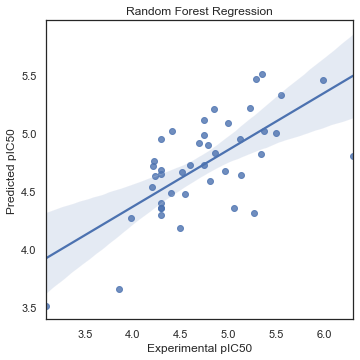

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.set(color_codes=True)
sns.set_style("white")
sns.regplot(x=y_test,y=pred1)
plt.xlabel("Experimental pIC50")
plt.ylabel("Predicted pIC50")
plt.title("Random Forest Regression")
plt.savefig('RandomForestRegression .png')
plt.show()

# Building a Regresion model using DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg2=DecisionTreeRegressor(random_state=8)


In [ ]:
reg2.fit(X_train,y_train)

DecisionTreeRegressor(random_state=8)

### Making the prediction 

In [ ]:
pred2=reg2.predict(X_test)

In [ ]:
print(pred2)

[4.         4.72815839 4.34969248 4.72952884 5.29242982 5.23657201
 4.79317412 5.25963731 4.30103    4.54452568 4.61083392 3.06048075
 4.30103    4.54060751 4.96657624 4.47643225 4.34628426 5.92811799
 3.63189915 5.7721133  5.1739252  5.1739252  5.         5.92811799
 5.7721133  4.39794001 4.61083392 3.81734073 3.87942607 4.08139308
 5.32790214 3.88974708 4.11237687 4.34628426 4.60302035 4.61083392
 5.16749109 4.72815839 5.         5.08092191 5.         5.91604609
 4.61083392]


### Regression score

In [ ]:
print(reg2.score(X_train,y_train))

0.8261717925262759


In [ ]:
reg2.score(X_test,y_test)

-0.006287020666483123

### Scatter plot of Predicted vs Experiemental pIC50 values

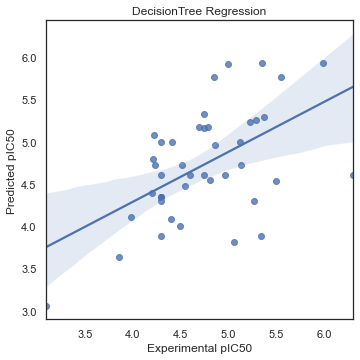

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.set(color_codes=True)
sns.set_style("white")
sns.regplot(x=y_test,y=pred2)
plt.xlabel("Experimental pIC50")
plt.ylabel("Predicted pIC50")
plt.title("DecisionTree Regression")
plt.savefig('DecisonTreeRegression.png')
plt.show()

# Building a Regression model using LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg3=LinearRegression()

In [ ]:
reg3.fit(X_train,y_train)

LinearRegression()

### Making the prediction

In [ ]:
pred3=reg3.predict(X_test)

In [ ]:
print(pred3)

[4.6559796  4.61762378 4.82529232 4.73502687 4.72966988 4.8133553
 4.64895497 4.73578194 4.51196742 4.64866928 4.29397234 4.76441405
 4.4712008  4.66713333 4.70265597 4.61419057 4.59543456 4.69752976
 4.46681566 4.70459125 4.78110782 4.78510072 4.6629779  4.63590148
 4.735547   4.62746361 4.54758947 4.42796541 4.7298082  4.75787551
 4.77571138 4.70421655 4.52534682 4.59543456 4.71450015 4.29397234
 4.68389996 4.78494154 4.58016977 4.49736923 4.53910839 4.50913609
 4.54795485]


### Regression score 

In [ ]:
print(reg3.score(X_train,y_train))
print(reg3.score(X_test,y_test))

0.03182179707690069
-0.049371395753075475


### Scatter plot of Predicted vs Experimental pIC50 values 

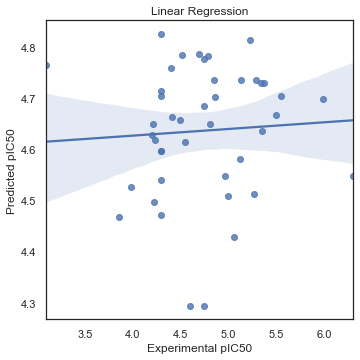

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.set(color_codes=True)
sns.set_style("white")
sns.regplot(x=y_test,y=pred3)
plt.xlabel("Experimental pIC50")
plt.ylabel("Predicted pIC50")
plt.title("Linear Regression")
plt.savefig('LinearRegression.png')
plt.show()

# Building a Regression model using KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg4=KNeighborsRegressor()
reg4.fit(X_train,y_train)

KNeighborsRegressor()

### Making the prediction

In [ ]:
pred4=reg4.predict(X_test)

### Regression score 

In [ ]:
print(reg4.score(X_train,y_train))
print(reg4.score(X_test,y_test))

0.2878123211990473
-0.04243553138424638


### Scatter plot of Predicted vs Experimental pIC50 values 

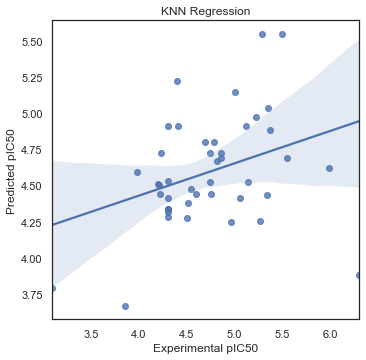

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.set(color_codes=True)
sns.set_style("white")
sns.regplot(x=y_test,y=pred4)
plt.xlabel("Experimental pIC50")
plt.ylabel("Predicted pIC50")
plt.title("KNN Regression")
plt.savefig('KNNRegression.png')
plt.show()

# Building a Regression model using SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
reg5=SVR()
reg5.fit(X_train,y_train)

SVR()

In [ ]:
pred5=reg5.predict(X_test)

In [ ]:
print(pred5)

[4.47928048 4.51375411 4.48919936 4.48787683 4.55395385 4.49771912
 4.47672467 4.49358144 4.47708158 4.47436302 4.49422803 4.49621473
 4.47915429 4.49463262 4.5158743  4.48416359 4.4825408  4.49728243
 4.63616833 4.49794816 4.49469785 4.49506849 4.86090846 4.48132507
 4.50090522 4.47260219 4.64234836 4.48233064 4.51682265 4.48636809
 4.50483365 4.61676196 4.50366191 4.4825408  4.48866318 4.49422803
 4.5139009  4.4843485  4.89968362 4.46887279 4.87753469 4.71603568
 4.66109718]


### Regression Score

In [ ]:
print(reg5.score(X_train,y_train))
print(reg5.score(X_test,y_test))

0.006602342791576565
-0.13173993783291627


### Scatter plot of Predicted vs Experimental pIC50 values 

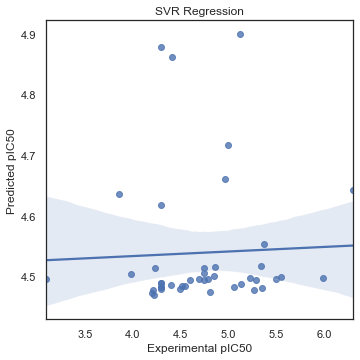

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.set(color_codes=True)
sns.set_style("white")
sns.regplot(x=y_test,y=pred5)
plt.xlabel("Experimental pIC50")
plt.ylabel("Predicted pIC50")
plt.title("SVR Regression")
plt.savefig('SVRRegression.png')
plt.show()